# Data gathering

## Imports

In [2]:
#%matplotlib inline
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from matplotlib.ticker import FormatStrFormatter

params = {'axes.labelsize': 'large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pl.rcParams.update(params)

unfiltered_data = pd.read_table('final_data_updated.csv', delimiter=',')

## Remove corrupted or invalid data

In [3]:
invalid_value_mask = np.equal(unfiltered_data, -1)
invalid_rows_mask = np.any(invalid_value_mask, axis=1)
data = unfiltered_data[~invalid_rows_mask]

## Specific projects

In [4]:
data = data.loc[data['Project'].isin(['Math', 'Time', 'Lang', 'Closure', 'Chart'])]
print(data['Project'].unique())

['Chart' 'Closure' 'Lang' 'Math' 'Time']


## Label

In [5]:
label = 'L-10'
y = data[label]

## Dataset split method

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def createTestSet(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = MinMaxScaler()
    X_train = getScaledDataset(X_train)
    X_test = getScaledDataset(X_test)
    return (X_train, X_test, y_train, y_test)

def getScaledDataset(X):
    scaler = MinMaxScaler()
    return scaler.fit_transform(X)

# GridSearch

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#X = data.filter(regex="(S|D|T|B)-.*")
X = data[['S-LineCount', 'T-AvgVEFT', 'T-#VE', 'T-CovFT', 'B-Files', 'D-DiDiameter', 'D-AvgInCloseness']]

X_train, X_test, y_train, y_test = createTestSet(X,y)
parameters = {'max_depth':range(2,10),
             'min_samples_leaf':np.arange(10,100,1)}
clf = GridSearchCV(DecisionTreeClassifier(max_leaf_nodes=50), parameters, n_jobs=-1, cv=StratifiedKFold(3))
clf.fit(X=X_train, y=y_train)

parameter = clf.best_params_
model = clf.best_estimator_

print("GridSearch training set results:")
print(clf.best_score_, parameter)
print("Score on test set:")
print(model.score(X_test, y_test))
print("Score on whole dataset:")
print(model.score(getScaledDataset(X), y))

GridSearch training set results:
0.868421052631579 {'max_depth': 2, 'min_samples_leaf': 23}
Score on test set:
0.835820895522388
Score on whole dataset:
0.8708708708708709


# Visualization

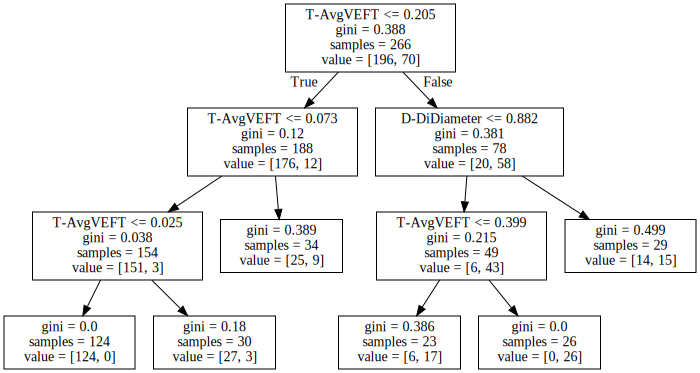

In [10]:
%config InlineBackend.figure_format = 'svg'
from graphviz import Source
from sklearn import tree
from IPython.display import SVG

Source(tree.export_graphviz(model, out_file=None, feature_names=X.columns))